In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read and Load the Data, Extract its Variable

In [28]:
def load_data(data):
    dataset = pd.read_csv(data)
    return dataset

def variable_data(data):
  y = data.iloc[: , 0]
  x = data.iloc[: , 1:]
  column = list(data.columns.values.tolist())
  feature_name = [str(x) for x in column[1:]]
  return y, x, feature_name

In [29]:
data1 = 'dataset/mlr_data2.csv'
dataset1 = pd.read_csv(data1, index_col='num_obs')
print(dataset1.head())

         quality  clarity  aroma  body  flavor  oakiness
num_obs                                                 
1            9.8      1.0    3.3   2.8     3.1       4.1
2           12.6      1.0    4.4   4.9     3.5       3.9
3           11.9      1.0    3.9   5.3     4.8       4.7
4           11.1      1.0    3.9   2.6     3.1       3.6
5           13.3      1.0    5.6   5.1     5.5       5.1


In [37]:
# Set independent and dependent variables

y, x, feature_name = variable_data(dataset1) 
n_samples, n_features = x.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

y_ = dataset1['quality'].to_numpy()
x_ = sm.add_constant(dataset1[['clarity', 'aroma', 'body', 'flavor', 'oakiness']].to_numpy())

Number of samples: 38
Number of features: 5


# Visualizing Multivariate Data

## Pairplot

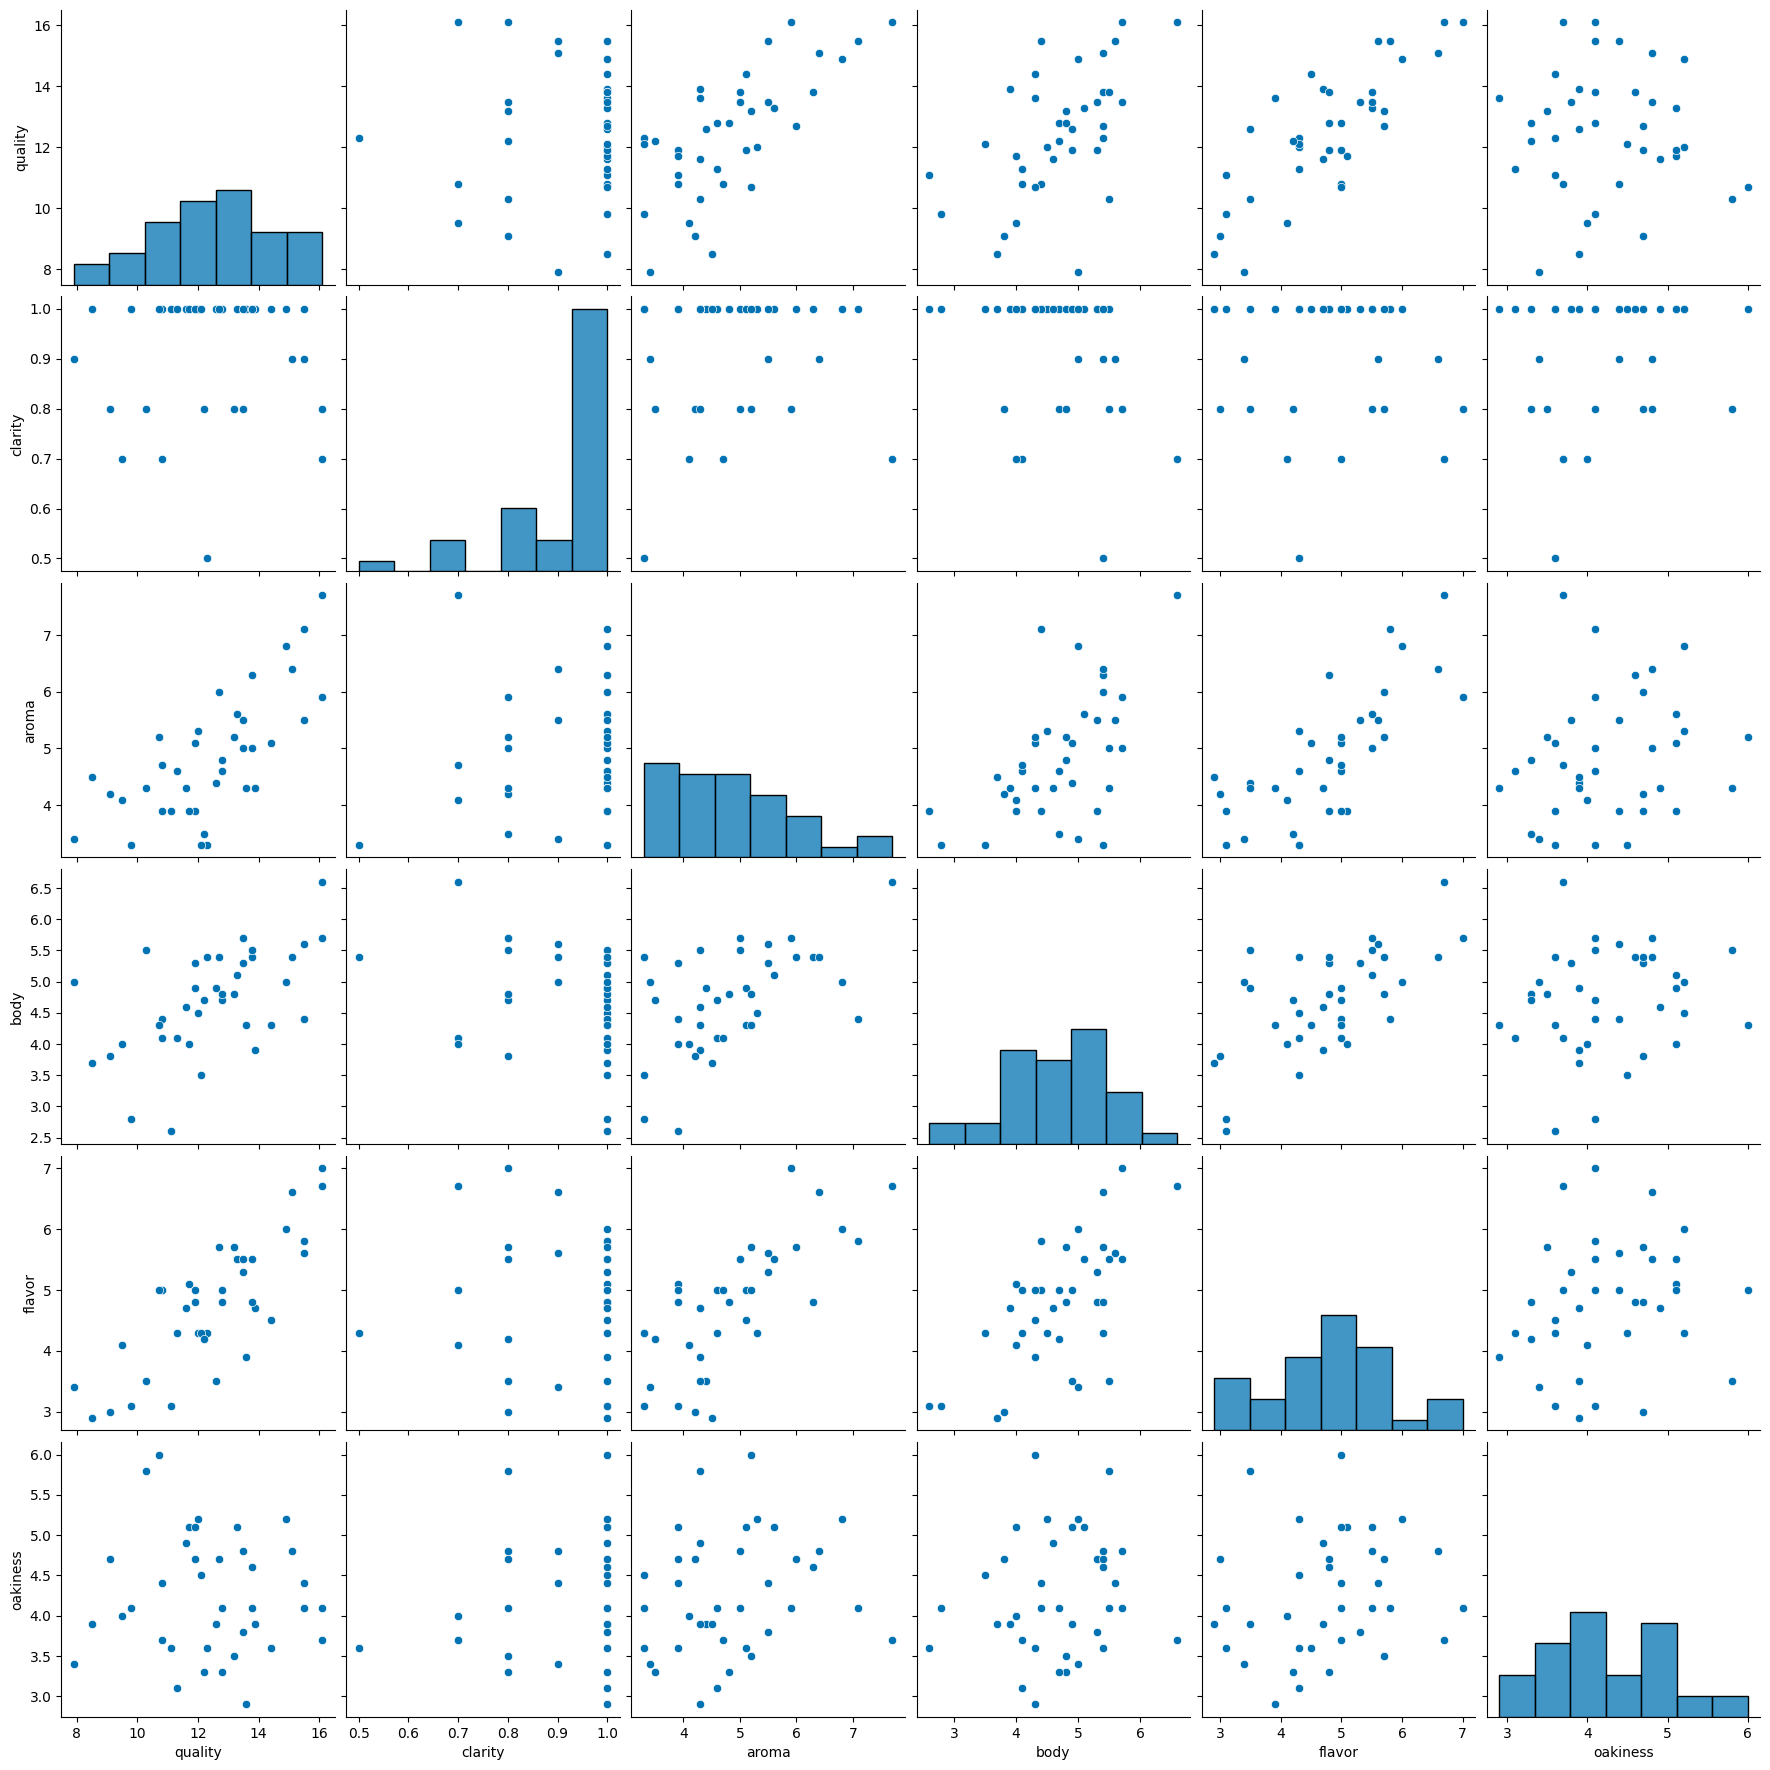

In [25]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=dataset1, height=3)

## Histogram

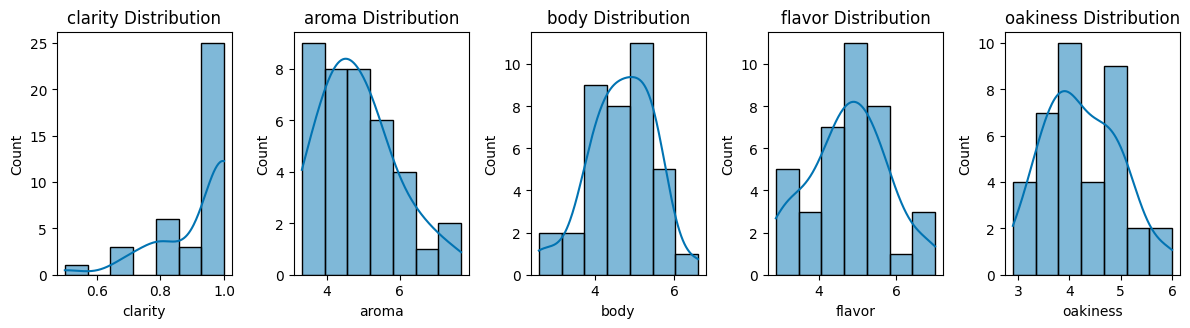

In [31]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 12))
for i, feature in enumerate(feature_name):
    plt.subplot(4, 5, i+1)
    sns.histplot(data=dataset1, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

## Correlation heatmaps

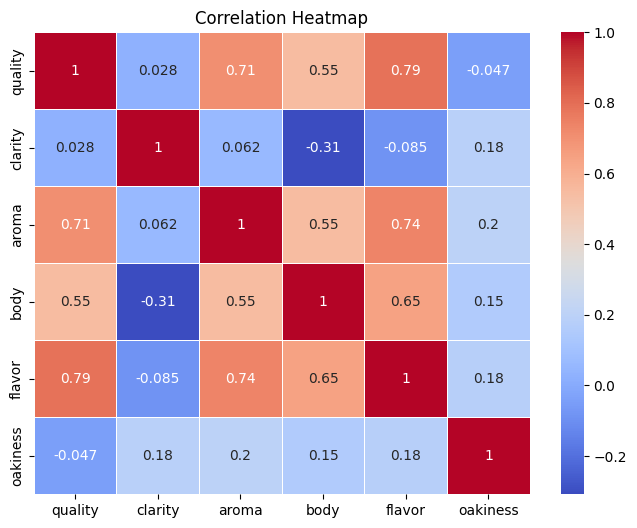

In [35]:
correlation_matrix = dataset1.corr(numeric_only= True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

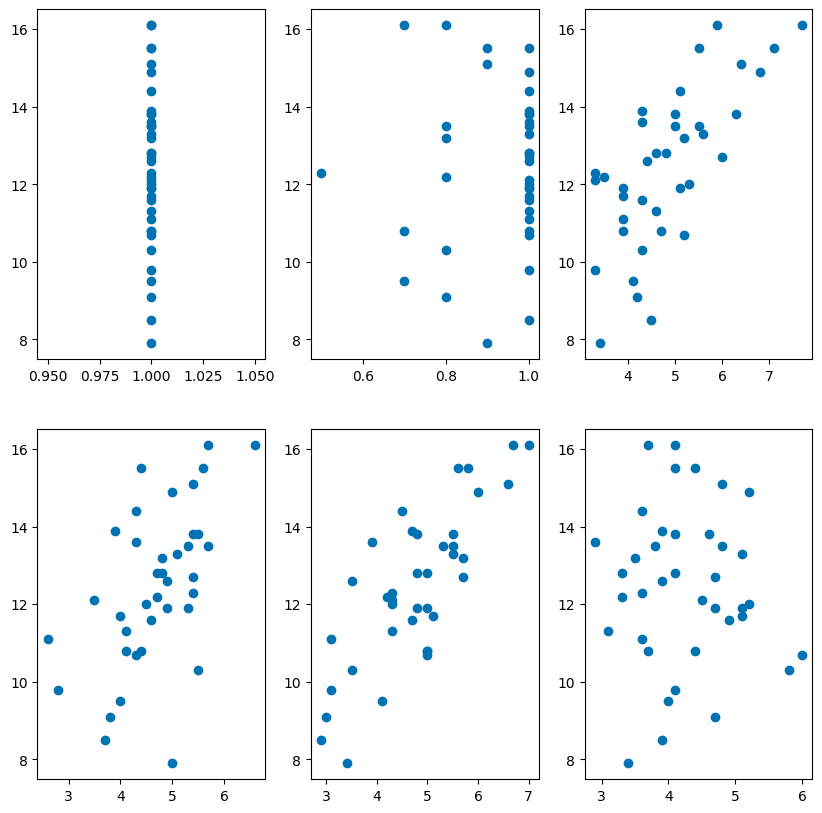

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))
axs[0, 0].plot(x_[:,0], y_, 'o')
axs[0, 1].plot(x_[:,1], y_, 'o')
axs[0, 2].plot(x_[:,2], y_, 'o')
axs[1, 0].plot(x_[:,3], y_, 'o')
axs[1, 1].plot(x_[:,4], y_, 'o')
axs[1, 2].plot(x_[:,5], y_, 'o')


# Construct model and find beta

## Find beta coefficients

In [50]:
def find_coeffs (x, y):
    left = np.matmul(x.transpose(), x)
    right = np.matmul(x.transpose(), y)

    solved = np.matmul(np.linalg.inv(left), right)
    #beta = np.dot((np.linalg.inv(np.dot(x.T, x))), np.dot(x.T, y))
    return solved

In [52]:
beta = find_coeffs(x_, y_)
print(f"Equation: y = {beta[0]:.5f} + {beta[1]:.5f}x1 + {beta[2]:.5f}x2 + {beta[3]:.5f}x3 + {beta[4]:.5f}x4 + {beta[5]:.5f}x5")

Equation: y = 3.99686 + 2.33945x1 + 0.48255x2 + 0.27316x3 + 1.16832x4 + -0.68401x5


## Data Prediction

In [53]:
def prediction(x, beta):
    pred = np.dot(x, beta)
    return pred

In [54]:
y_pred = prediction(x_, beta)

## Evaluate model

In [55]:
# Calculating mean absolute error
mae_ = np.mean(np.abs(y_pred - y))

# Calculating root mean square error
mse_ = np.square(np.subtract(y, y_pred)).mean()
rmse_ = math.sqrt(mse_)

# Calculating r_square
RSS = np.sum(np.square((y - y_pred)))
y_mean = np.mean(y)
TSS = np.sum(np.square(y - y_mean))
r2score_ = 1 - (RSS / TSS)

# Standard error prediction, RPD, Bias
sep_ = np.std(y_pred - y)
rpd_ = np.std(y)/sep_
bias_ = np.mean(y_pred - y)

print(f"Coefficient of determination (R^2): {r2score_:.2f}")
print(f"Mean absolute error (MAE): {mae_:.2f}")
print(f"Mean squared error (MSE): {mse_:.2f}")
print(f"Root mean squared error (RMSE): {rmse_:.2f}")
print(f"Standard error prediction: {sep_:.2f}")
print(f"RPD: {rpd_:.2f}")
print(f"Bias: {bias_:.2f}")

Coefficient of determination (R^2): 0.72
Mean absolute error (MAE): 0.85
Mean squared error (MSE): 1.14
Root mean squared error (RMSE): 1.07
Standard error prediction: 1.07
RPD: 1.89
Bias: 0.00


# Visualize our model into 3D

In [56]:
# Set independent and dependent variables
X_vis = dataset1[['aroma', 'body']]
y_vis = dataset1['quality']

# Initialize model from sklearn and fit it into our data
beta_vis = find_coeffs(X_vis, y_vis)

y_pred_vis = prediction(X_vis, beta_vis)


C:\Users\Asus\AppData\Local\Temp\ipykernel_6368\375838639.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  left = np.matmul(x.transpose(), x)


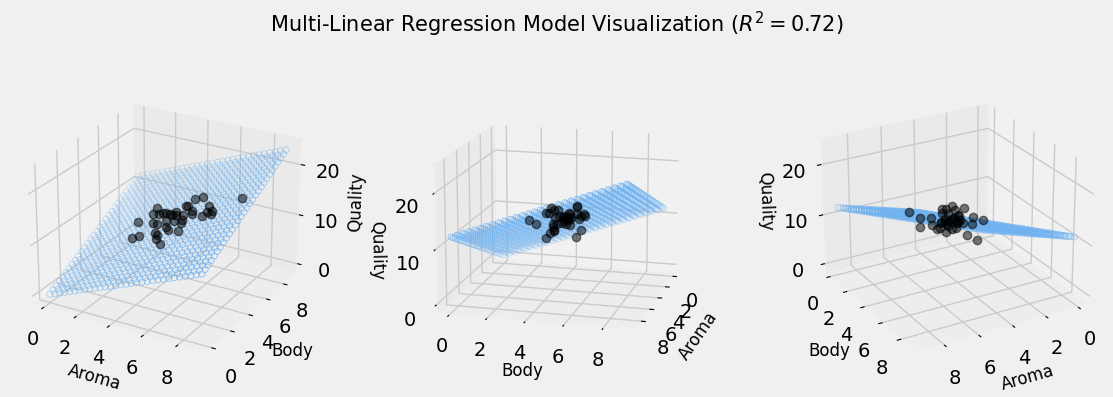

In [16]:
# Prepare data
X_ = dataset1[['aroma', 'body']].values.reshape(-1,2)
Y_ = dataset1['quality']

# Create range for each dimension
x = X_[:, 0]
y = X_[:, 1]
z = Y_

xx_pred = np.linspace(0, 9, 30)  # range of aroma values
yy_pred = np.linspace(0, 9, 30)  # range of body values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

predicted_vis = prediction(model_viz, beta_vis)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted_vis, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Aroma', fontsize=12)
    ax.set_ylabel('Body', fontsize=12)
    ax.set_zlabel('Quality', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2score_, fontsize=15, color='k')

fig.tight_layout()

# Statistical Testing

In [67]:
## Ordinary Least Square - Linear Regression
ols_model = smf.ols(formula='quality ~ clarity + aroma + body + flavor + oakiness', data=dataset1).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     16.51
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           4.70e-08
Time:                        23:17:30   Log-Likelihood:                -56.378
No. Observations:                  38   AIC:                             124.8
Df Residuals:                      32   BIC:                             134.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9969      2.232      1.791      0.083      -0.549       8.543
clarity        2.3395      1.735      1.349      0.187      -1.194       5.873
aroma          0.4826      0.272      1.771      0.086      -0.072       1.038
body           0.2732      0.333      0.821      0.418      -0.404       0.951
flavor         1.1683      0.304      3.837      0.001       0.548       1.789
oakiness      -0.6840      0.271     -2.522      0.017      -1.236      -0.132
==============================================================================
Omnibus:                        1.181   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.020
Skew:                          -0.384   Prob(JB):                        0.601
Kurtosis:                       2.770   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Coefficient of Determination (R²)

In [77]:
print('R2 score:', ols_model.rsquared)
print('It means {} % of our dependent (response) variable can be explained using our independent (predictor) variables'.format(round(ols_model.rsquared*100, 2)))

R2 score: 0.720599218128954
It means 72.06 % of our dependent (response) variable can be explained using our independent (predictor) variables


## F-test (ANOVA)

In [70]:
print('F-statistic:', ols_model.fvalue)
print('Probability of observing value at least as high as F-statistic:', ols_model.f_pvalue)
if ols_model.f_pvalue<0.05:
    print('Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.')
else:
    print('Because our f_pvalue is higher than 0.05 we can conclude that our model performs worse than other simpler model.')

F-statistic: 16.506163530185976
Probability of observing value at least as high as F-statistic: 4.703039743520588e-08
Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.


## T-test

independent variables with p-value less than 0.05 shows that there is sufficient evidence that they affects our respon variable.

In [79]:
print(ols_model.pvalues)


Intercept    0.082775
clarity      0.186958
aroma        0.086058
body         0.417503
flavor       0.000552
oakiness     0.016833
dtype: float64


# Assumption Testing

In [58]:
# Residual/Error
residual_ = y - y_pred

dataset1['quality_pred'] = y_pred
dataset1['residual'] = residual_

dataset1.head()

,quality,clarity,aroma,body,flavor,oakiness,quality_pred,residual
num_obs,,,,,,,,
1,9.8,1.0,3.3,2.8,3.1,4.1,9.510948,0.289052
2,12.6,1.0,4.4,4.9,3.5,3.9,11.219524,1.380476
3,11.9,1.0,3.9,5.3,4.8,4.7,12.059126,-0.159126
4,11.1,1.0,3.9,2.6,3.1,3.6,10.087852,1.012148
5,13.3,1.0,5.6,5.1,5.5,5.1,13.369052,-0.069052


## Linearity

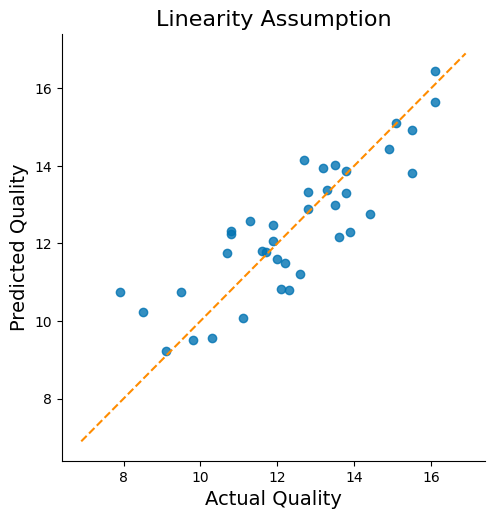

there is linear relationship between our independent and dependent variables.


In [59]:
# Plotting the observed vs predited values
sns.lmplot(x='quality', y='quality_pred', data=dataset1, fit_reg=False)

# Plotting the diagonal line
line_coords = np.arange(dataset1[['quality', 'quality_pred']].min().min()-1, 
                        dataset1[['quality', 'quality_pred']].max().max()+1)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Quality', fontsize = 14)
plt.xlabel('Actual Quality', fontsize = 14)
plt.title('Linearity Assumption', fontsize = 16)
plt.show()
print("there is linear relationship between our independent and dependent variables.")

## Normality

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.4860632031978151
Residuals are normally distributed


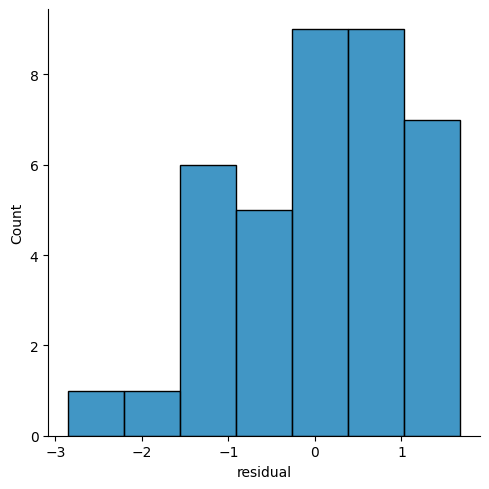

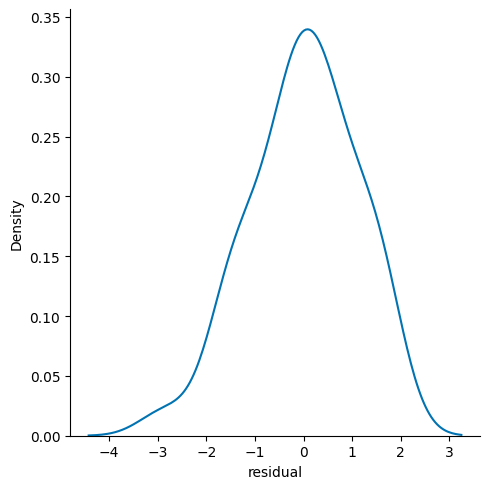

In [60]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(dataset1['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
sns.displot(dataset1['residual'])
sns.displot(dataset1['residual'], kind='kde')

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else: 
    print('Residuals are normally distributed')

## Multicollinearity

Pearson correlation coefficient matrix of each variables:
            quality   clarity     aroma      body    flavor  oakiness
quality   1.000000  0.028441  0.707324  0.548702  0.790047 -0.047040
clarity   0.028441  1.000000  0.061902 -0.308378 -0.085160  0.183215
aroma     0.707324  0.061902  1.000000  0.548910  0.736561  0.201644
body      0.548702 -0.308378  0.548910  1.000000  0.646659  0.152106
flavor    0.790047 -0.085160  0.736561  0.646659  1.000000  0.179761
oakiness -0.047040  0.183215  0.201644  0.152106  0.179761  1.000000


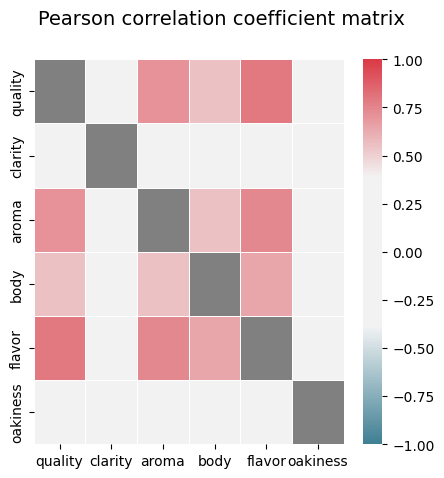

In [61]:
corr = dataset1[['quality','clarity', 'aroma', 'body', 'flavor', 'oakiness']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

## Autocorrelation

In [62]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(dataset1['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 0.8367616289206999
Signs of positive autocorrelation 

Assumption not satisfied


## Homoscedasticity

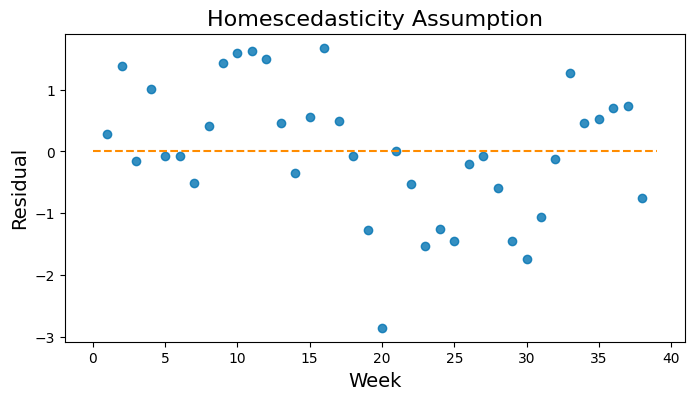

In [63]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=dataset1.index, y=dataset1.residual, alpha=0.8)
plt.plot(np.repeat(0, len(dataset1.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()

# Refcode

In [142]:
# https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
# https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Multiple-linear-regression/MLR-simple-example/index.html
# https://medium.com/analytics-vidhya/multiple-linear-regression-from-scratch-using-only-numpy-98fc010a1926

https://ethanweed.github.io/pythonbook/05.04-regression.html